# Basic Data Analysis Project-II

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#display wide tables 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

We have a list of 10,000 movies with IMDB user rating as `imdb.txt`. We want to perform a exploratory data analysis of this data in Python by using its Pandas library.  We will perform the cleaning, transformation and then visualization on the raw data. This will help us to understand the data for further processing.

In [3]:
# !cat datasets/imdb.txt

## 1. Loading data

Read the imdb.txt into dataframe named data. The data is tab delimited. The columns names are 'imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'

In [6]:
# Your code here
df = pd.read_csv("datasets/imdb.txt", delimiter ="\t", header=None)


In [8]:
df.columns = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']

In [9]:
df

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...,...
9995,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
9996,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
9997,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
9998,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance


Check the data types of each column

In [3]:
# Your code here


## 2. Clean the DataFrame

The data frame has several problems

1. The runtime column is stored as a string
2. The genres column has several genres together. This way, it is hard to check which movies are Action movies and so on.
3. The movie year is also present in the title


### Fix the runtime column
Convert the string '142 mins' to number 142.

In [10]:
# Your code here
df['runtime'] = df['runtime'].apply(lambda x: x.strip().split(" ")[0])

Perform this conversion on every element in the dataframe `data` using `List Comprehesnion`.

In [59]:
# Your code here


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


If you are unable to do it, then execute the following

In [ ]:
with pd.HDFStore("data_1.h5") as store:
    data = store["/data"]
    
data.head()

In [ ]:
data.to_csv('data_1.csv', sep='\t')

### Split the genres

We would like to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

First, we would like to find the all the unique genres present in any record. Its better to sort the genres to locate easily.

In [4]:
#determine the unique genres


Then make a column for each genre

In [5]:
#make a column for each genre


In [113]:
df.head()

,imdbID,title,year,score,votes,runtime,genres,Mystery,News,Reality-TV,War,History,Horror,Family,Romance,Film-Noir,Sport,Comedy,Biography,Animation,Action,Thriller,Music,Western,Adult,Crime,Adventure,Drama,Musical,Sci-Fi,Fantasy
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0


### Eliminate year from the title
We can fix each element by stripping off the last 7 characters

In [63]:
#Strip off last 7 character from title


'The Shawshank Redemption'

In [66]:
df.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


If you are unable to do it, then execute the following 

In [ ]:
with pd.HDFStore("data_2.h5") as store:
    data = store["/data"]
    
data.head()

In [ ]:
data.to_csv('data_2.csv', sep='\t')

## 3. Descriptive Statistics

Next, we would like to discover outliers. One possible way is to describe some basic, global summaries of the DataFrame on `score`, `runtime`, `year`, `votes`.

In [115]:
#Call `describe` on relevant columns


,score,runtime,year,votes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.386070,103.578400,1993.472800,16604.012800
std,1.189933,26.628698,14.829924,34563.459698
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2333.750000
50%,6.600000,102.000000,1998.000000,4980.500000
75%,7.200000,115.000000,2005.000000,15277.750000
max,9.200000,450.000000,2011.000000,619479.000000


Do you see any quantity unusual. Better replace with NAN.

In [ ]:
#Your code here


Lets repeat describe to make sure that it is fine

In [ ]:
#Your code here


### Basic plots

Lets draw histograms for release year, IMDB rating, runtime distribution

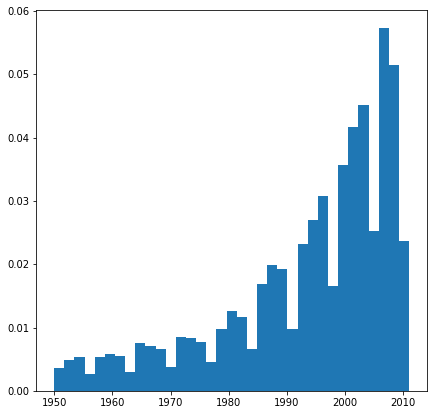

In [123]:
#Your code here


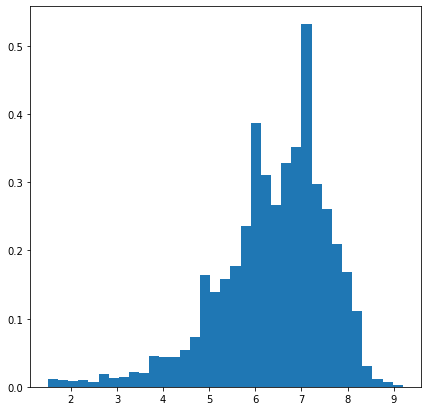

In [124]:
#Your code here


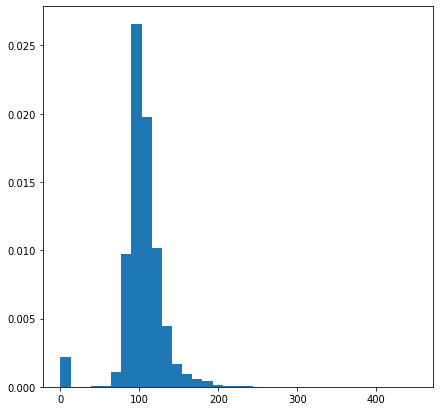

In [125]:
#Your code here


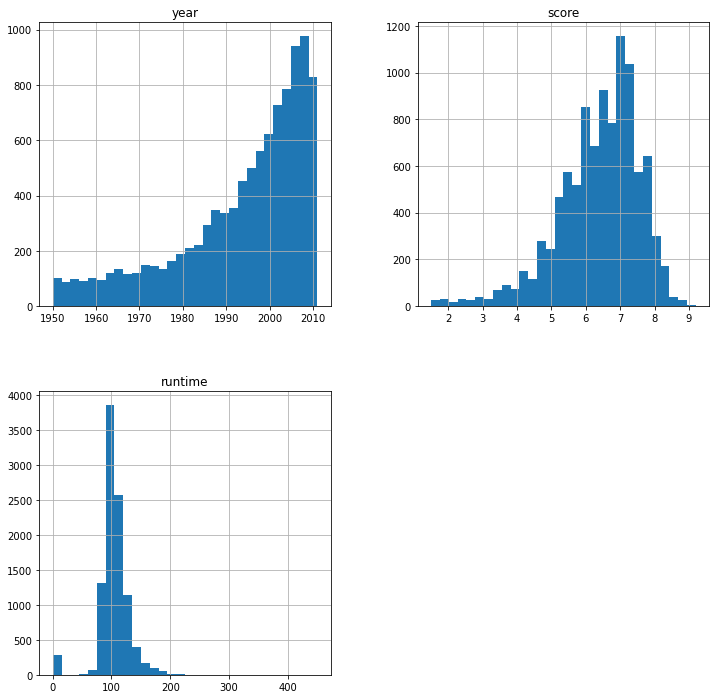

In [133]:
# all plots in one frame


Scatter plot between IMDB rating and years. Does it shows some trend?

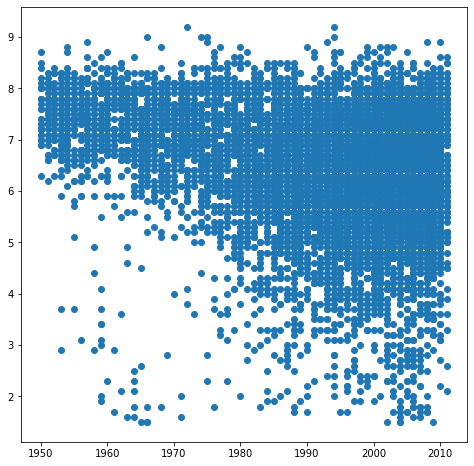

In [141]:
#Your code here


There is negative relationship between years and score of the moives. It means that by increasing of years the rating of movies are also decreasing.

Is there any relationship between IMDB rating and number of votes? Describe

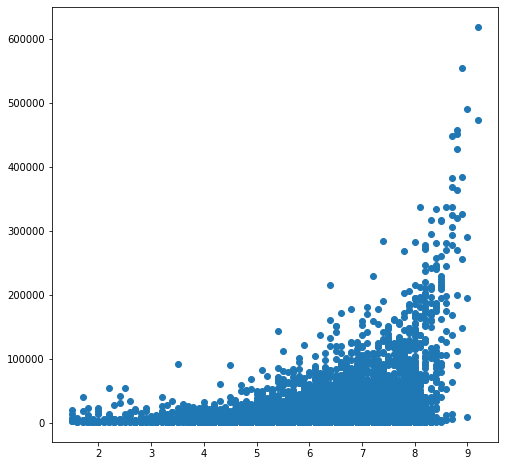

In [142]:
#Your code here


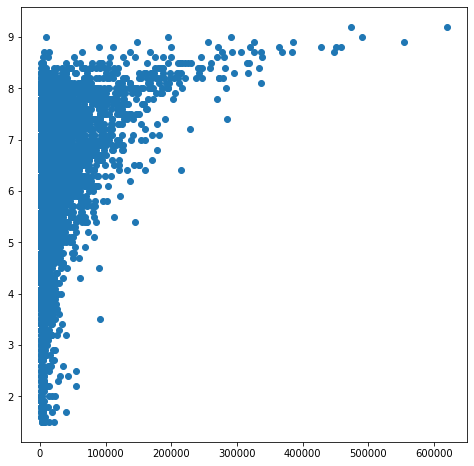

In [143]:
#Your code here


There is some sort of positive relationship between score and votes.

### Data aggregation/Summarization

*What genres are the most frequent?* Lay down the genres in descending order of count

In [6]:
#Your code here


Drama         5698
Comedy        3923
Thriller      2832
Romance       2441
Action        1891
Crime         1867
Adventure     1313
Horror        1215
Mystery       1009
Fantasy        916
Sci-Fi         897
Family         754
Music          619
War            512
Biography      394
History        358
Animation      314
Sport          288
Musical        260
Western        235
Film-Noir       40
Adult            9
News             1
Reality-TV       1
dtype: int64

Draw a bar plot to show top ten genres

In [152]:
#Your code here


Drama        5698
Comedy       3923
Thriller     2832
Romance      2441
Action       1891
Crime        1867
Adventure    1313
Horror       1215
Mystery      1009
Fantasy       916
dtype: int64

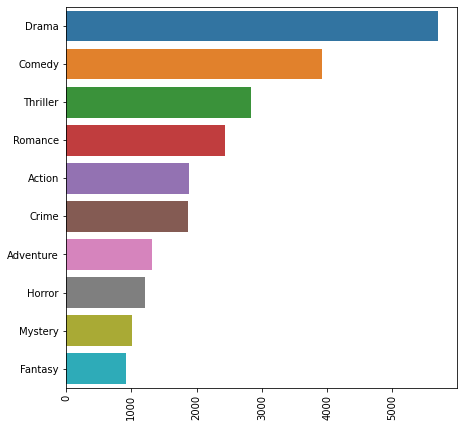

*How many genres does a movie have, on average?*

In [176]:
#Your code here


3

## Explore Group Properties

Let's split up movies by decade. Find the decade mean score and draw a plot as follows:

<img src=images/score-year-plot.png>

In [192]:
#Your code here


2000    4174
1990    2339
1980    1339
1970     740
1960     566
1950     429
2010     413
Name: year, dtype: int64

,decade,average-score
0,1950,7.244522
1,1960,7.062367
2,1970,6.842297
3,1980,6.248693
4,1990,6.199316
5,2000,6.278079
6,2010,6.344552


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


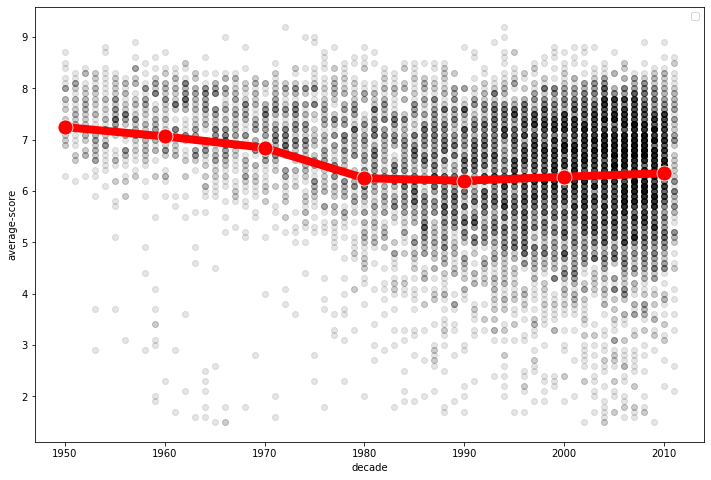

Find the most popular movie each year


In [289]:
#Your code here


,imdbID,title,year,score,votes,runtime,genres,Mystery,News,Reality-TV,War,History,Horror,Family,Romance,Film-Noir,Sport,Comedy,Biography,Animation,Action,Thriller,Music,Western,Adult,Crime,Adventure,Drama,Musical,Sci-Fi,Fantasy,decade
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1990
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1990
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1990
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1990
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,2010
